---
title: "Forelesning 4 - Virkninger og ringvirkninger"
format: 
  html:
    code-fold: true
---

# Hva er virkninger?

Det følger av Finansdepartementets rundskriv [R-109/2021]( https://www.regjeringen.no/no/tema/okonomi-og-budsjett/statlig-okonomistyring/samfunnsokonomiske-analyser/id438830/) at man i utredningen skal beskrive hvilke nytte- og kostnadsvirkninger de ulike tiltakene forventes å ha, hvem og hvilke områder som blir berørt, og hvordan disse blir berørt. Virkningene skal beskrives som *endringer sammenlignet med nullalternativet*. 
Virkninger som *ikke* skal telles med:
* Virkninger som også ville ha oppstått uten tiltaket
* Kostnader (eller nytte) som allerede har påløpt eller vedtatt, skal inkluderes som en virkning av tiltakene som analyseres, såkalt «sunk cost»

Husk at nullalternativet er *uviklingen* av dagens situasjon, og ikke situasjonen akkurat nå. Endringer som må påregnes i fremtiden må derfor tas med i nullalternativet.
Som hovedregel er det kun grupper i Norge som skal tas med.

# Nyttevirkninger:
Nyttevirkninger er positive virkninger, effekter, fordeler eller gevinster.
* økt trygghet som følge av redusert kriminalitet
* økt tilfredshet hos brukerne når kvaliteten på tjenesten forbedres
* tidsbesparelser ved forenklet rapportering
* helsegevinster når helsehjelpen blir mer tilgjengelig
* miljøgevinster når forurensningen i et turområde reduseres
* økt personvern som følge av nytt regelverk
* kostnadsbesparelser som frigjør ressurser

# Kostnadsvirkninger:

Kostnadsvirkninger, også kalt negative virkninger,43 er virkninger som reduserer velferden for én eller flere grupper i samfunnet eller for samfunnet samlet som følge av tiltaket, for eksempel

* tap av liv og helse ved økt risiko for ulykker
* miljøkostnader som følge av tapte naturområder
* redusert trygghetsfølelse ved mindre politi i gatene
* tapt tid i arbeid og opplevd stress når barnehagetilbudet reduseres

# Omfordeling

Omfordeling av ressurser mellom berørte grupper gir i utgangspunktet ingen reell effekt for samfunnet som helhet og vil derfor ikke påvirke den samfunnsøkonomiske lønnsomheten av et tiltak. Den nytten én gruppe oppnår av tiltaket, motsvares da av en like stor kostnad for en annen gruppe. Dette gjelder for eksempel merverdiavgift, som virksomhetene krever inn av kundene sine på vegne av staten. 

Dersom omfordelingen fører til endret adferd hos dem som mottar eller fratas midler, skal slike tilpasninger tas med som en samfunnsøkonomisk virkning. Det finnes en rekke overføringer som vil kunne lede til endret adferd, for eksempel avgifter, tilskudd eller subsidier. For eksempel kan reduserte avgifter lede til at flere bedrifter etablerer seg i et marked.

Det er viktig å huske på at omfordelingen mellom ulike grupper kan innebære en endring i skattefinansieringskostnaden og dermed påvirke tiltakets samfunnsøkonomiske lønnsomhet. For eksempel vil økt barne- eller arbeidstrygd føre til økt skattefinansieringskostnad.

# Dobbeltelling:

Tiltak vil ofte kunne tilsynelatende ha flere virkninger som egentlig er den samme. For eksempel:

* En miljøavgift sørger for redusert produksjon av en vare med negative eksterne effekter (for eksempel en forurensende bedrift). Det reduserte forbruket er ikke en ekstra virkning, men bare en kostnad som er flyttet fra negative miljøkonsekvenser for samfunnet til et "tilsynelatende dødvektstap". 
* En kanskje enda vanligere dobbeltelling er samme virkning med ulik benevnelse, for eksempel om en både teller opp at det er blitt flere fisk i elven på grunn av mindre forurensning og at fiskerene har fått økt overskudd.

Likevektsvolum uten eksterne effekter er 67.01254150645487
Likevektsvolum med eksterne effekter er 50.0


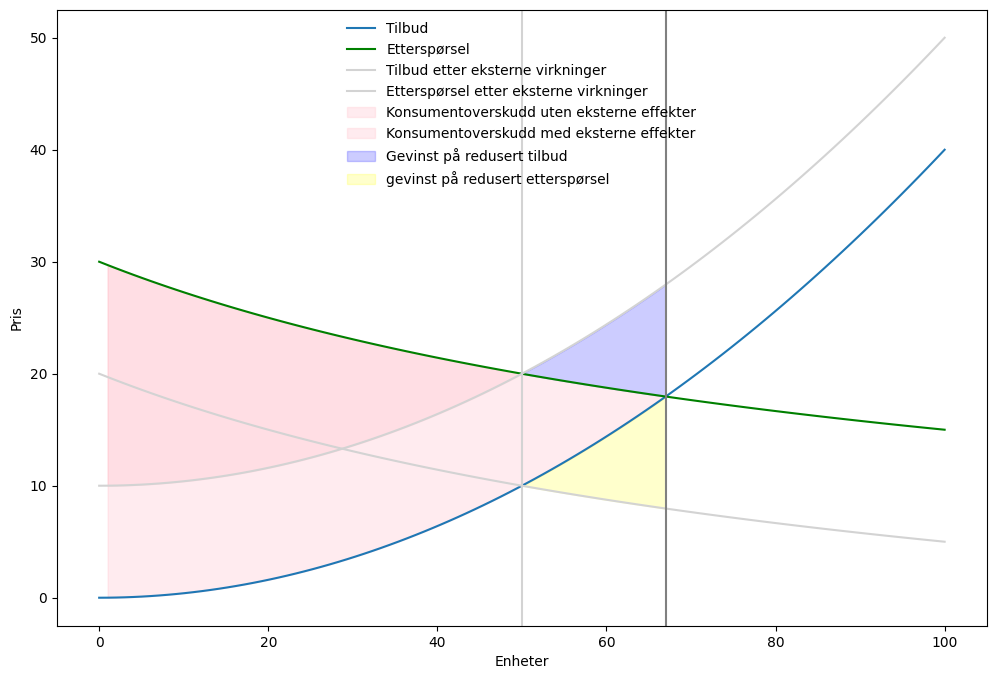

In [8]:
#drawing 100 points in the interval 0.0 to 100
from matplotlib import pyplot as plt
import numpy as np
from sympy.solvers import solve
import sympy as sp

EXTERNAL_EFFECT = 10

def supply(x):
    return (x**2)*(1/250)
    
def demand(x):
    return 3000/(100+x)

q = np.linspace(1,100,100)

#creating the plot
q = np.linspace(0,100,100)
fig,ax=plt.subplots(figsize=(12, 8))

ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')


#drawing supply
ax.plot(q,supply(q),label='Tilbud')

#drawing demand
ax.plot(q,demand(q),color='green',label='Etterspørsel')

#drawing supply after external effects
ax.plot(q,supply(q)+EXTERNAL_EFFECT,label='Tilbud etter eksterne virkninger', color='lightgrey')

#drawing demand after external effects
ax.plot(q,demand(q)-EXTERNAL_EFFECT,label='Etterspørsel etter eksterne virkninger', color='lightgrey')

#adding legend:
ax.legend(loc='upper center',frameon=False)

#Solving for equilibrium
def equlibrium(demand, supply, effect):
    x=sp.symbols('x')
    eq_cond=sp.Eq(demand(x),supply(x)+effect)
    x_eq=solve(eq_cond,x)
    p_eq=demand(x_eq[0])
    return float(x_eq[0]), float(p_eq)

x_eq, p_eq = equlibrium(demand, supply, 0)
x_eq_ext, p_eq_ext = equlibrium(demand, supply, EXTERNAL_EFFECT)

# Add vertical grey line at x_eq
ax.axvline(x=x_eq, color='grey')
ax.axvline(x=x_eq_ext, color='lightgrey')

#fills 
q = np.linspace(1,x_eq,100)
ax.fill_between(q,demand(q),supply(q), color = "pink",alpha = 0.3,label='Konsumentoverskudd uten eksterne effekter')

q = np.linspace(1,x_eq_ext,100)
ax.fill_between(q,demand(q),supply(q)+EXTERNAL_EFFECT, color = "pink",alpha = 0.3,label='Konsumentoverskudd med eksterne effekter')


q = np.linspace(x_eq_ext,x_eq,100)
ax.fill_between(q,demand(q),supply(q)+EXTERNAL_EFFECT, color = "blue",alpha = 0.2,label='Gevinst på redusert tilbud')

q = np.linspace(x_eq_ext,x_eq,100)
ax.fill_between(q,demand(q)-EXTERNAL_EFFECT,supply(q), color = "yellow",alpha = 0.2,label='gevinst på redusert etterspørsel')

ax.legend(loc='upper center',frameon=False)

print(f"Likevektsvolum uten eksterne effekter er {x_eq}")
print(f"Likevektsvolum med eksterne effekter er {x_eq_ext}")

I figuren er en situasjon med eksterne virkninger tegnet opp. Vi ser at pareto-optimalt volum faller fra 67 til 50. Det blir dobbelttelling å ta med både gevinsten på etterspørselssiden og på tilbudssiden

# Identifiser og beskriv virkningene

For å identifisere de samfunnsøkonomiske virkningene for hvert av tiltakene som utredes, anbefales det å følge disse stegene: 

1. Identifiser de berørte gruppene. 
2. Spesifiser egenskapene som driver virkningene for de berørte gruppene.
3. Bruk årsaksforholdene til å finne de samfunnsøkonomiske virkningene.
4. Ta en ekstra sjekk – er det noe som er fordelingsvirkninger eller telt dobbelt?

# Ringvirkninger

Dersom en ringvirkning skal ha en netto samfunnsøkonomisk verdi, må det finnes en markedssvikt i sekundærmarkedene som innebærer at det før tiltaket er et under- eller overforbruk av ressurser sammenlignet med det som er samfunnsøkonomisk optimalt.
Veilederen kap. 4.3


>Det finnes ikke tilstrekkelig empirisk grunnlag til å beregne netto ringvirkninger i samfunnsøkonomiske analyser. Slike virkninger skal derfor ikke inngå i selve analysen.

>Dersom det er grunnlag for å anta at tiltaket vil ha netto ringvirkninger, slik som virkninger på arbeidstilbud, areal eller konkurransesituasjonen ut over det som er fanget opp i den ordinære beregningen av nytte, kan informasjon om dette inngå i en >tilleggsanalyse. Tilleggsanalysen kan inneholde både kvantitativ og kvalitativ informasjon som vil kunne være nyttig for beslutningstakerne.

<div style="text-align: right"> <i>Krav i rundskriv R-109/2021, punkt 10.2 Tilleggsanalyser - Netto ringvirkninger</i></div>

# Ringvirkninger

Ringvirkninger kan være både positive og negative. For å kategorisere disse, kan vi kalle markedene som direkte påvirkes for "primærmarkeder", mens de som indirekte påvirkes kan vi kalle for "sekundærmarkeder". *Ringvirkninger er endring i ressursbruk i en likevektssituasjon i sekundærmarkeder*. Som et eksempel er transportmarkedet et primærmarked for tiltak innen transportinfrastruktur. Arbeidsmarkedet, eiendomsmarkedet, og markedene for varer og tjenester som benytter transport, er derimot sekundærmarkeder.

Dersom det er grunnlag for å tro at tiltaket vil påvirke for eksempel arbeidstilbud, arealbruk eller konkurransesituasjon mer enn det som er tatt hensyn til i den vanlige nyttevurderingen, må dette i så fall inngå i en tilleggsanalyse. Tilleggsanalysen av netto ringvirkninger kan inneholde både kvantitativ og kvalitativ informasjon som vil kunne være nyttig for beslutningstakeren.

I mange tilfeller er det av interesse å forstå de lokale konsekvensene av et tiltak, som for eksempel hvilken innvirkning et prosjekt innen transportinfrastruktur kan ha på et spesifikt område. Hvis slike lokale effekter oppveies av effekter i motsatt retning andre steder, er det snakk om en ren omfordelingsmekanisme. La oss si at et transporttiltak øker produktiviteten i en gitt region, men samtidig reduserer produktiviteten i en annen. Hvis nettoendringen i produktivitet er null, betyr det at tiltaket primært har en omfordelingseffekt, uten å generere en netto samfunnsøkonomisk verdi.

Selv om omfordelingseffekten kan være betydelig, kan den fortsatt spille en rolle i beslutningstakers evaluering av tiltaket. Derfor bør slike effekter inkluderes i en tilleggsanalyse som fokuserer på fordelingsvirkningene. For mer informasjon, se kapittel 3.7 om fordelingsvirkninger.

Typer ringvirkninger:

* Produktivitet og stordriftsfordeler: 
* Større byer er generelt mer produktive.
* Arbeidsmarkedet: 
* Bedrifter får bedre tilgang på arbeidskraft
* Arbeidstakere får mer utvalg av jobber
* Areal og transport
* Prisendring er i utgangspunktet bare omfordeling
* Frigjort areal kan ha samfunnsøkonomisk positiv virkning
* Ufullkommen konkurranse
* Styrking av konkurranse kan være samfunnsøkonomisk gevinst